In [3]:
%load_ext autoreload
%autoreload 2

# Модуль 4. Теоретический минимум для ML: 
## линейная алгебра,начала мат.анализа и оптимизации, статистика.

## 1. Линейная алгебра
### Задача 4

### Исследовательское задание: малоранговая аппроксимация матрицы. 

Сгенерируйте случайную квадратную матрицу A ∈ R n×n, n ≥ 100. 

Выполните сингулярное разложение этой матрицы, и получите три
матрицы: U, S, V⊤. 

Выполните аппроксимацию матрицы A с рангом r, меняя его значение, например, от 2 до n:

A˜ = U[:, : r]S[: r, : r]V ⊤[: r, :],

и каждый раз считайте ошибку апроксимации (как восстановленная матрица отличается от исходной): 
E(r) = ||A − A˜|| = sqrt[sum(sum((aij − a˜ij )^2))]

## Решение Первый вариант

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [5]:
# Генерация случайной квадратной матрицы A
n = 100
A = np.random.rand(n, n)

In [6]:
# Вычисление сингулярного разложения матрицы A
U, S, Vt = np.linalg.svd(A)

In [7]:
# Создание пустого массива для хранения ошибок аппроксимации
errors = []

# Выполнение аппроксимации матрицы A с различными значениями ранга r
for r in range(2, n+1):
    # Построение матрицы A˜
    A_approx = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]

    # Вычисление ошибки аппроксимации
    error = np.linalg.norm(A - A_approx)

    # Добавление ошибки в массив
    errors.append(error)

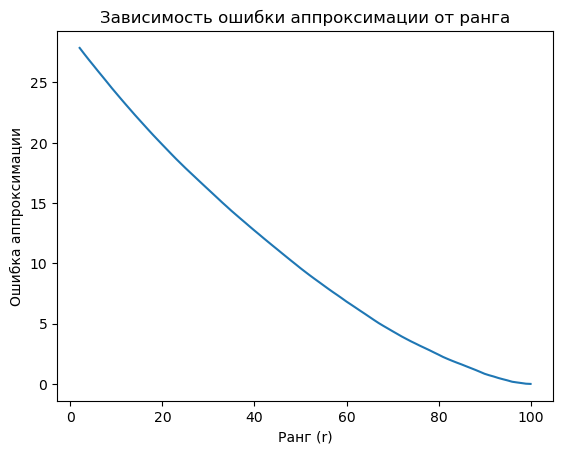

In [8]:
# Построение графика зависимости ошибки аппроксимации от ранга r
plt.plot(range(2, n+1), errors)
plt.xlabel('Ранг (r)')
plt.ylabel('Ошибка аппроксимации')
plt.title('Зависимость ошибки аппроксимации от ранга')
plt.show()

## Решение Второй вариант

In [9]:
n = 100
A = np.random.rand(n,n)
# perform SVD
U, S, Vt = svd(A)

In [10]:
S_diag = np.diag(S)

In [11]:
# Аппроксимация
errors = []
for r in range(2,101):
    A_approx = U[:, :r] @ S_diag[:r, :r] @ Vt[:r, :]
    error = np.linalg.norm(A - A_approx)
    errors.append(error)  

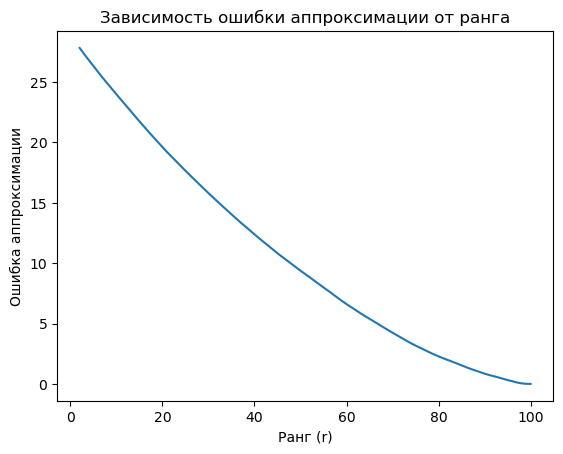

In [12]:
plt.plot(range(2, n+1), errors)
plt.xlabel('Ранг (r)')
plt.ylabel('Ошибка аппроксимации')
plt.title('Зависимость ошибки аппроксимации от ранга')
plt.show()

## Выводы

Результаты решений совпали